# Projet informatique : détection du temps d'arrivée des ondes P et S
#### EOST 1A par Bastien et Valentin

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("bmh")

%matplotlib inline


## Données

In [2]:
data = np.genfromtxt("data/R4B4A_HHZ.txt")
n = len(data)


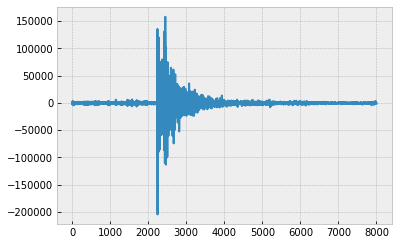

In [3]:
plt.plot(data)


## Traitement des données
Les données sont déjà traitées, on a juste à les convertir en un signal positif pour par la suite effectuer des rapports. Il faudrait utiliser l'amplitude instantanée/l'enveloppe du signal, qu'on a pas encore vu, donc on se contente pour l'instant d'utiliser la valeur absolue du signal.

In [4]:
# TODO enveloppe du signal


In [5]:
processed_data = abs(data)


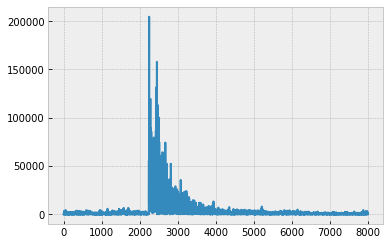

In [6]:
plt.plot(processed_data)


## Méthode STA/LTA
### Principe
On va ici chercher à calculer le rapport des moyenne d'une petit portion du signal (STA pour short term average) sur une grande (LTA pour long term average). 

Ces rapports sont calculés pour tous les grands intervalles possibles, et pour chacun de ces grands intervalles on en déduit le petit intervalle qu'on place à la fin du grand intervalle et dont on a déterminé à l'avance la longueur.

Le grand intervalle correspond à la variable `big_slice_interval` et le petit `small_slice_interval` et permet récupérer les portions du signal d'intérêts (`big_slice` la grande et `small_slice` la petite). A partir de ces intervalles on récupère leur valeur moyenne (à justifier pourquoi) et on calcule le rapport `ratio` qu'on ajoute à la liste `ratios` avec le temps correspondant à ce rapport dans `times`.

Problème de cette méthode : On perds de l'information sur le début du signal, si les ondes arrivent rapidement après le début du signal on fausse le résultat.

In [7]:
big_slices_size = 200
small_slices_size = 5

times = []
ratios = []

for k in range(0, n-big_slices_size):
    big_slice_interval = (k, k+big_slices_size)
    small_slice_interval = (
        k+big_slices_size-small_slices_size, k+big_slices_size)

    a, b = big_slice_interval
    big_slice = processed_data[a:b]

    c, d = small_slice_interval
    small_slice = processed_data[c:d]

    STA = np.average(small_slice)
    LTA = np.average(big_slice)

    time = np.average(small_slice_interval)
    ratio = STA/LTA

    times.append(time)
    ratios.append(ratio)


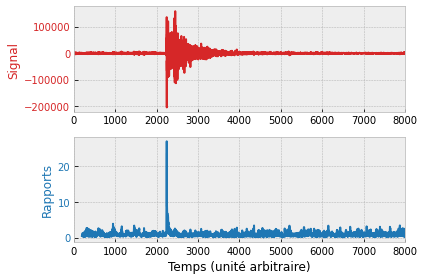

In [8]:
fig, axs = plt.subplots(2)
ax1, ax2 = axs

color = 'tab:red'
ax1.set_ylabel('Signal', color=color)
ax1.plot(data, color=color)
ax1.set_xlim([0, n])
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.set_ylabel('Rapports', color=color)
ax2.plot(times, ratios, color=color)
ax2.set_xlim([0, n])
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlabel('Temps (unité arbitraire)')
fig.tight_layout()


On observe un pic très marqué qui correspond au temps d'arrivée du premier champ d'onde (P). Nous pouvons simplement récupérer ce temps.

In [9]:
i = np.argmax(ratios)
time = times[i]
print(f"Le temps estimé d'arrivée des ondes P est {time} (unité inconnue).")


Le temps estimé d'arrivée des ondes P est 2245.5 (unité inconnue).


### Pratique
En utilisant cette méthode sur les différentes composantes du signal nous pouvons déterminer le temps d'arrivée des différentes ondes :
- En utilisant les composantes horizontales (N, S, E, W, 1, 2) nous pouvons déterminer le temps d'arrivée des ondes P. (A verifier, c'est peut être l'inverse)
- En utilisant la composante verticale (Z) nous pouvons déterminer le temps d'arrivée des ondes S.

#### Encapsulage en fonctions

In [10]:
def STALTA(signal, big_slices_size=200, small_slices_size=5):
    n = len(signal)
    times = []
    ratios = []

    for k in range(0, n-big_slices_size):
        big_slice_interval = (k, k+big_slices_size)
        small_slice_interval = (
            k+big_slices_size-small_slices_size, k+big_slices_size)

        a, b = big_slice_interval
        big_slice = signal[a:b]

        c, d = small_slice_interval
        small_slice = signal[c:d]

        STA = np.average(small_slice)
        LTA = np.average(big_slice)

        time = np.average(small_slice_interval)
        ratio = STA/LTA

        times.append(time)
        ratios.append(ratio)

    return times, ratios


In [11]:
def display(times, ratios, signal, title=""):
    n = len(signal)
    fig, axs = plt.subplots(2)
    ax1, ax2 = axs

    fig.suptitle(title)
    
    color = 'tab:red'
    ax1.set_ylabel('Signal', color=color)
    ax1.plot(signal, color=color)
    ax1.set_xlim([0, n])
    ax1.tick_params(axis='y', labelcolor=color)

    color = 'tab:blue'
    ax2.set_ylabel('Rapports', color=color)
    ax2.plot(times, ratios, color=color)
    ax2.set_xlim([0, n])
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_xlabel('Temps (unité arbitraire)')
    fig.tight_layout()
    
    return fig, axs


In [12]:
def find_time(times, ratios):
    i = np.argmax(ratios)
    time = times[i]

    return time


#### Utilisations des fonctions

5187.0
5180.0
4702.0


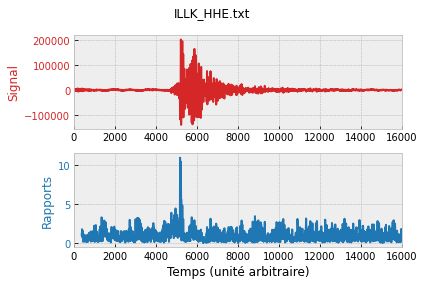

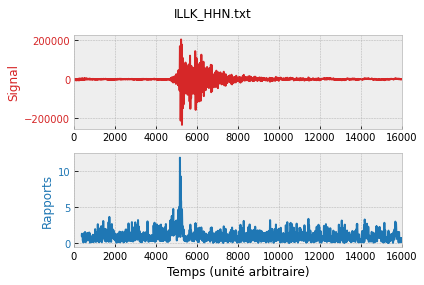

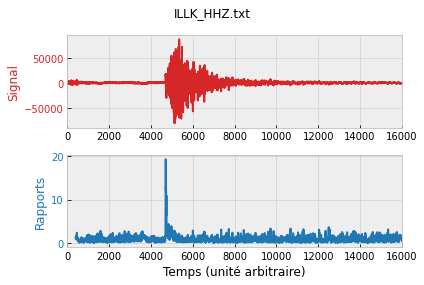

In [13]:
files = ['ILLK_HHE.txt', 'ILLK_HHN.txt', 'ILLK_HHZ.txt']
for file in files:
    data = np.genfromtxt(f'data/{file}')
    processed_data = np.abs(data)

    times, ratios = STALTA(
        processed_data, big_slices_size=400, small_slices_size=10)
    display(times, ratios, data, title=file)
    time = find_time(times, ratios)
    print(time)


2425.0
2423.0
2244.0


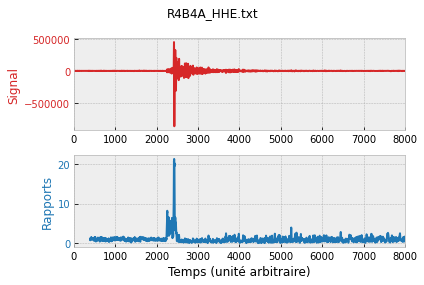

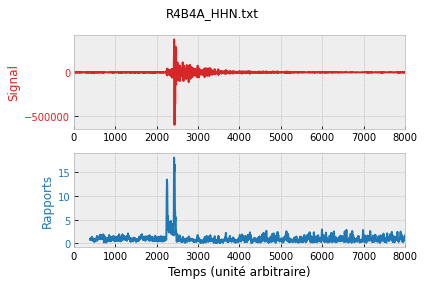

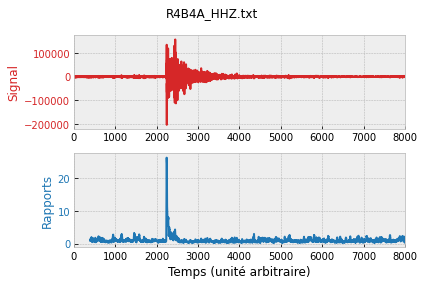

In [14]:
files = ['R4B4A_HHE.txt', 'R4B4A_HHN.txt', 'R4B4A_HHZ.txt']
for file in files:
    data = np.genfromtxt(f'data/{file}')
    processed_data = np.abs(data)

    times, ratios = STALTA(
        processed_data, big_slices_size=400, small_slices_size=10)
    display(times, ratios, data, title=file)
    time = find_time(times, ratios)
    print(time)
